In [50]:
import torch

x = torch.arange(4.0, requires_grad=True)


## Detaching Computation

Q: Why detach is needed?

A: For example, baselines in policy gradients: Advantage = return − baseline; the baseline is detached when computing the policy loss.

In [51]:
y = x * x
u = y.detach()
z = u * x

z.sum().backward()  # sum() is just a reduction to make the output scalar so backward() can run
x.grad == u


tensor([True, True, True, True])

## Exercises

### Q4

`torch.autograd.grad(outputs=y, inputs=x, grad_outputs=v)` is calculating:

$$
\frac{\partial (v^\top y)}{\partial x}
= v^\top \frac{\partial y}{\partial x}
= v^\top J
$$

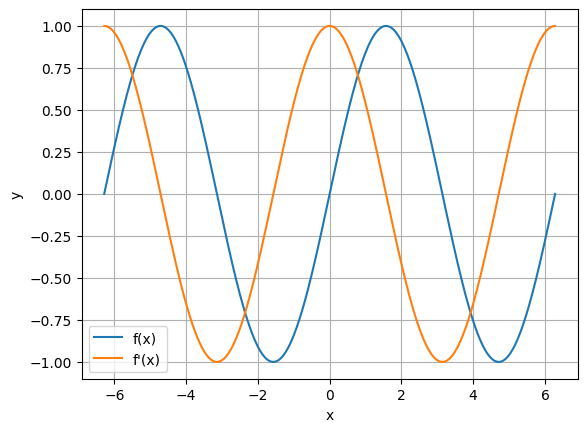

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-2 * torch.pi, 2 * torch.pi, steps=500, requires_grad=True)

y = torch.sin(x)

(dy_dx,) = torch.autograd.grad(outputs=y, inputs=x, grad_outputs=torch.ones_like(y))
plt.plot(x.detach().numpy(), y.detach().numpy(), label="f(x)")
plt.plot(x.detach().numpy(), dy_dx.detach().numpy(), label="f'(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Q5

$a=x^2$

$b=\log a$

$c=\sin x$

$d=bc$

$e=\frac{1}{x}$

$f=d+e$

So the graph expressed in adjacency list is:

```
x: a, c, e
a: b
b: d
c: d
d: f
e: f
f: (none)
```

## Q6

According to Q5, the answer is:

$$
\frac{df}{dx}
= \frac{\partial f}{\partial d}\frac{\partial d}{\partial b}\frac{\partial b}{\partial a}\frac{\partial a}{\partial x}

+ \frac{\partial f}{\partial d}\frac{\partial d}{\partial c}\frac{\partial c}{\partial x}
+ \frac{\partial f}{\partial e}\frac{\partial e}{\partial x}
$$

## Q7

$$
a=x^2 \quad\Rightarrow\quad \frac{da}{dx}=2x
$$

$$
b=\log a \quad\Rightarrow\quad
\frac{db}{dx}=\frac{1}{a}\frac{da}{dx}=\frac{2x}{a}=\frac{2}{x}
$$

$$
c=\sin x \quad\Rightarrow\quad \frac{dc}{dx}=\cos x
$$

$$
d=bc \quad\Rightarrow\quad
\frac{dd}{dx}=c\frac{db}{dx}+b\frac{dc}{dx}
=\sin x\cdot\frac{2}{x}+\log(x^2)\cos x
$$

$$
e=x^{-1} \quad\Rightarrow\quad \frac{de}{dx}=-x^{-2}
$$

$$
f=d+e \quad\Rightarrow\quad
\frac{df}{dx}=\frac{dd}{dx}+\frac{de}{dx}
=\frac{2\sin x}{x}+\log(x^2)\cos x-\frac{1}{x^2}
$$